In [159]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [160]:
df=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Baseball/baseball.csv")

# Exploratory Data Analysis (EDA)

In [161]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [162]:
df.shape

(30, 17)

In [163]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [164]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

<Axes: >

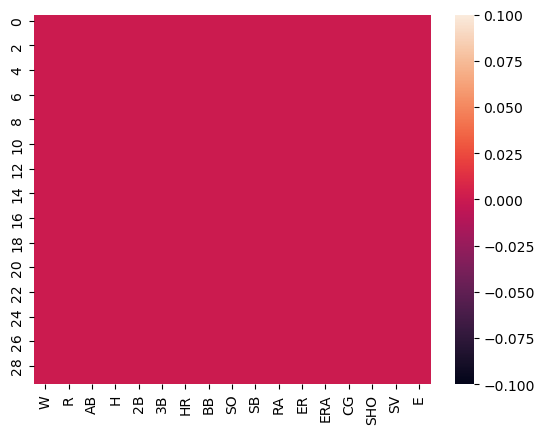

In [165]:
#Let's visualize using heatmap
sns.heatmap(df.isnull())

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


No need to change the datatype they are appropriate so we can skip the step of data conversion Now directly jumps to Visualization

## Visualization

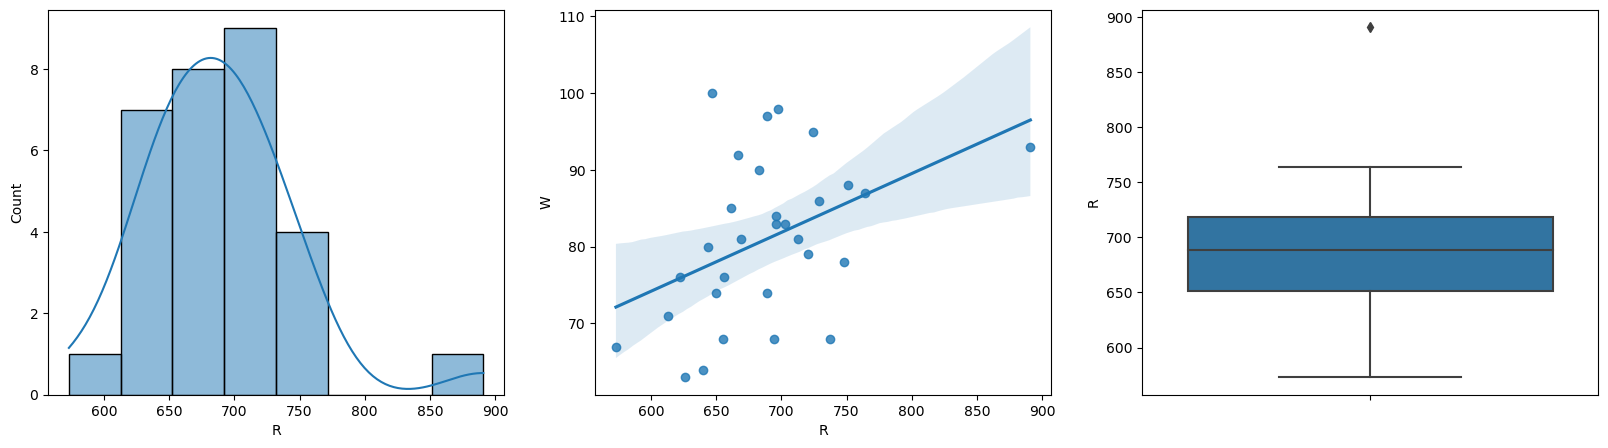

In [167]:
def pplot(df,i):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.histplot(x=i,data=df,kde=True)
    plt.subplot(1,3,2)
    sns.regplot(x=i,y='W',data=df)
    plt.subplot(1,3,3)
    sns.boxplot(y=i,data=df)
    plt.show()
    
pplot(df, 'R')

Run and win are linearly correlated. And outliers are present between 850 and 900

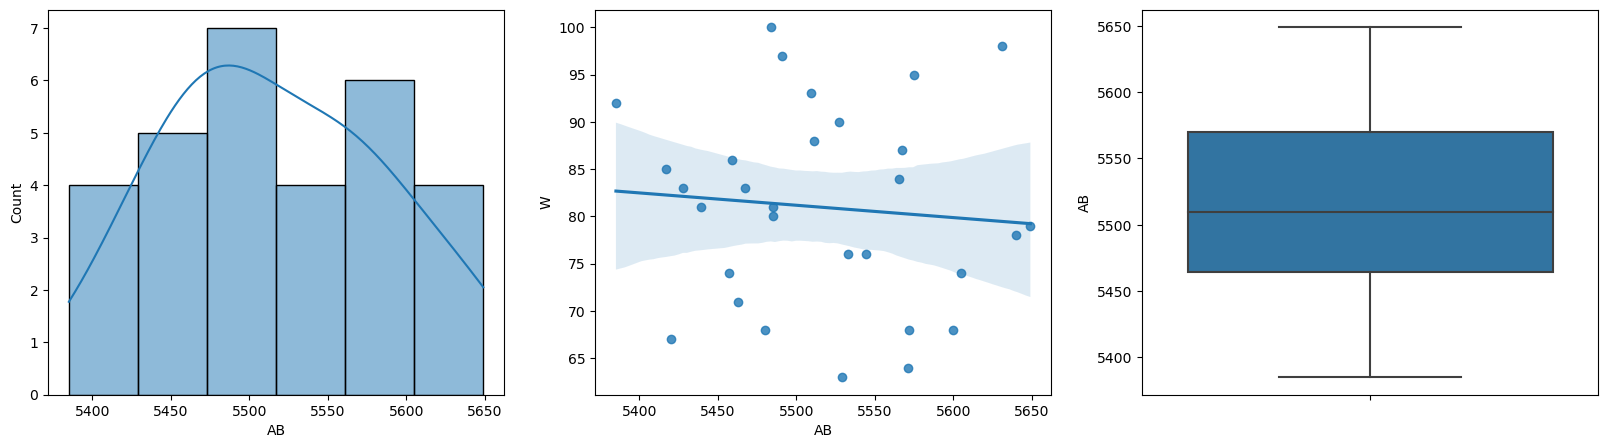

In [168]:
pplot(df, 'AB')

At balls is very weekly related to Wins With no outliers.

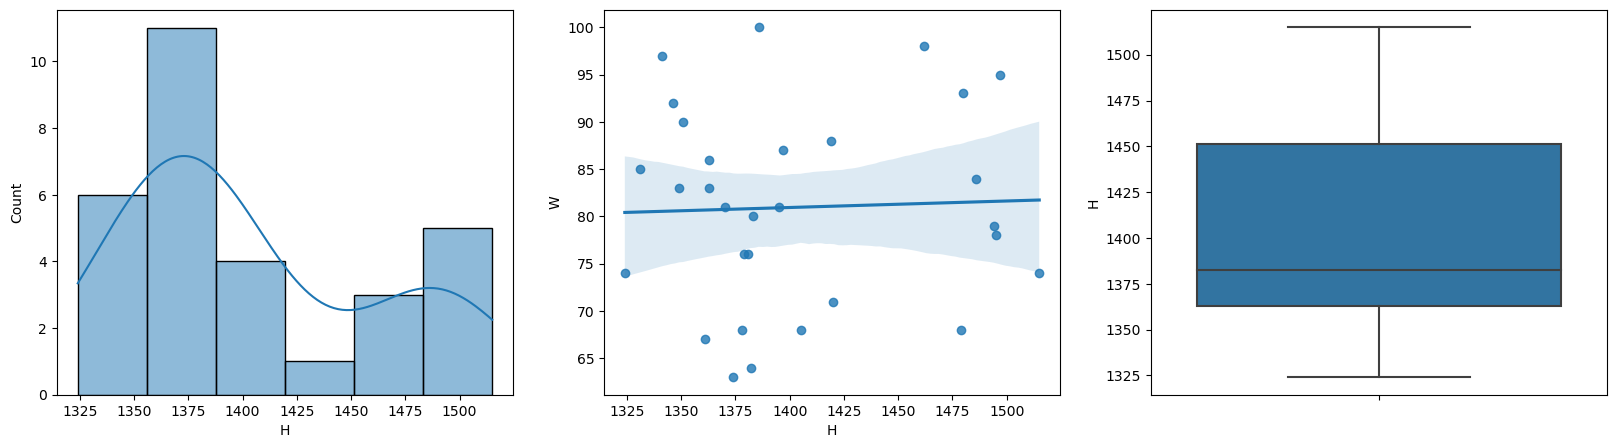

In [169]:
pplot(df, 'H')

Hits are also very weekly related to winning with no outliers

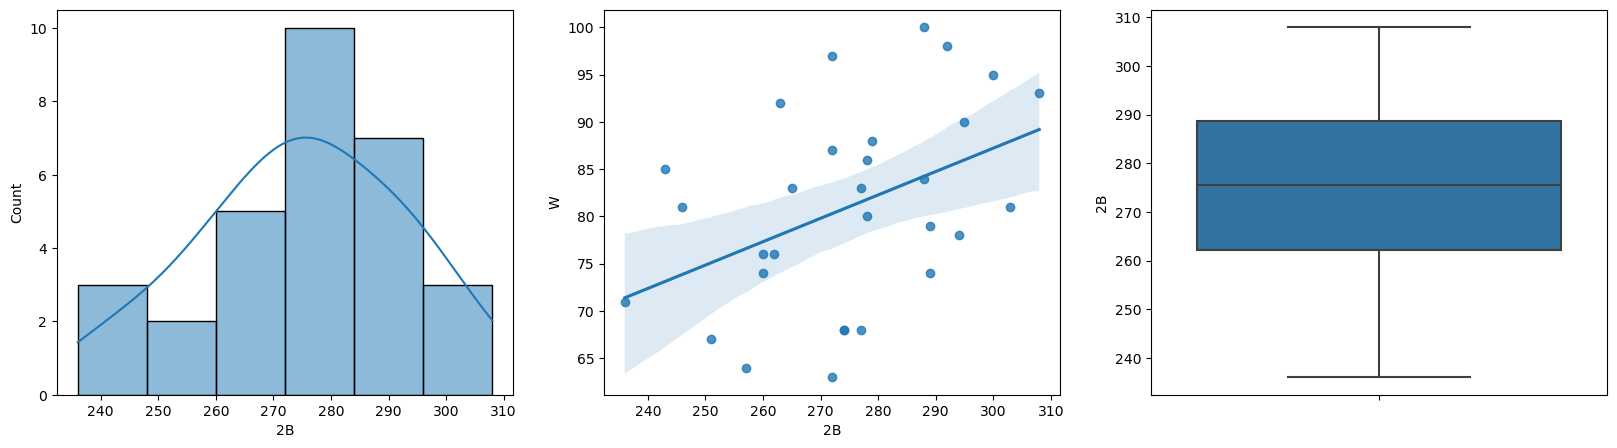

In [170]:
pplot(df, '2B')

Doubles are linearly related with Wins, with no outlier, and data is left-skewed

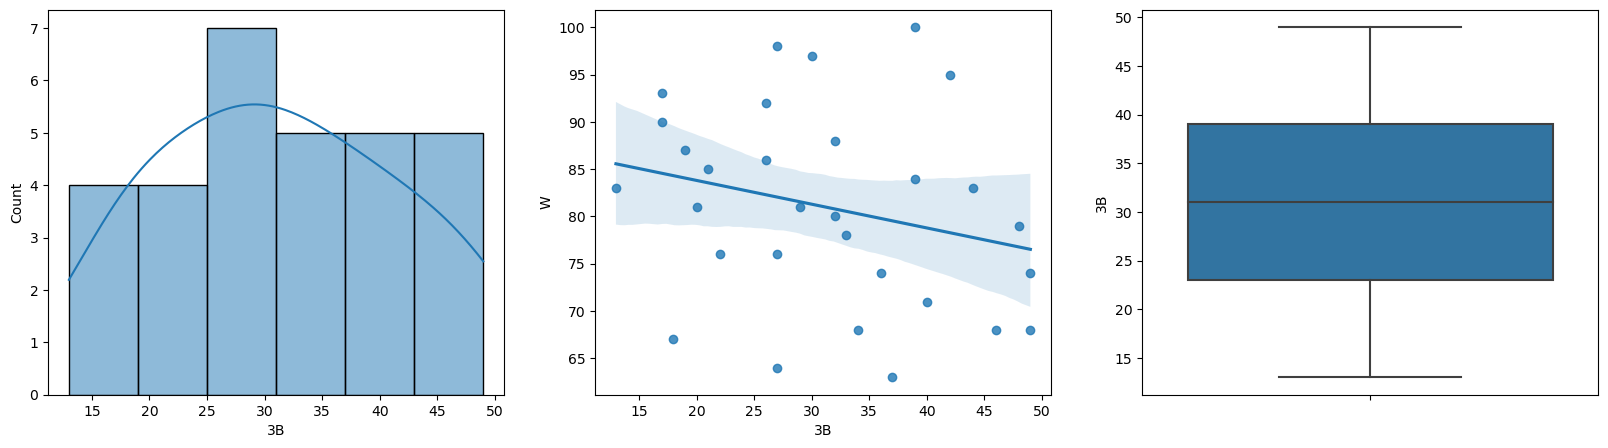

In [171]:
pplot(df, '3B')

Triple has very weak negative correlations with win with no outlier and data is right-skewed

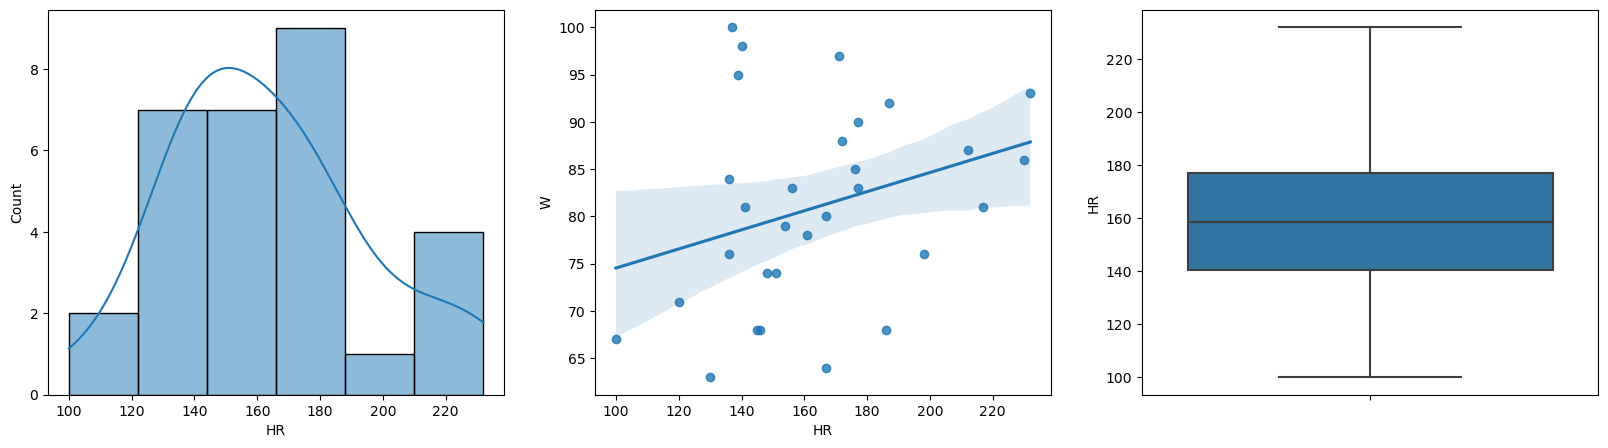

In [172]:
pplot(df, 'HR')

The home run has a very low correlation with wins with no lot of outliers and data is right-skewed

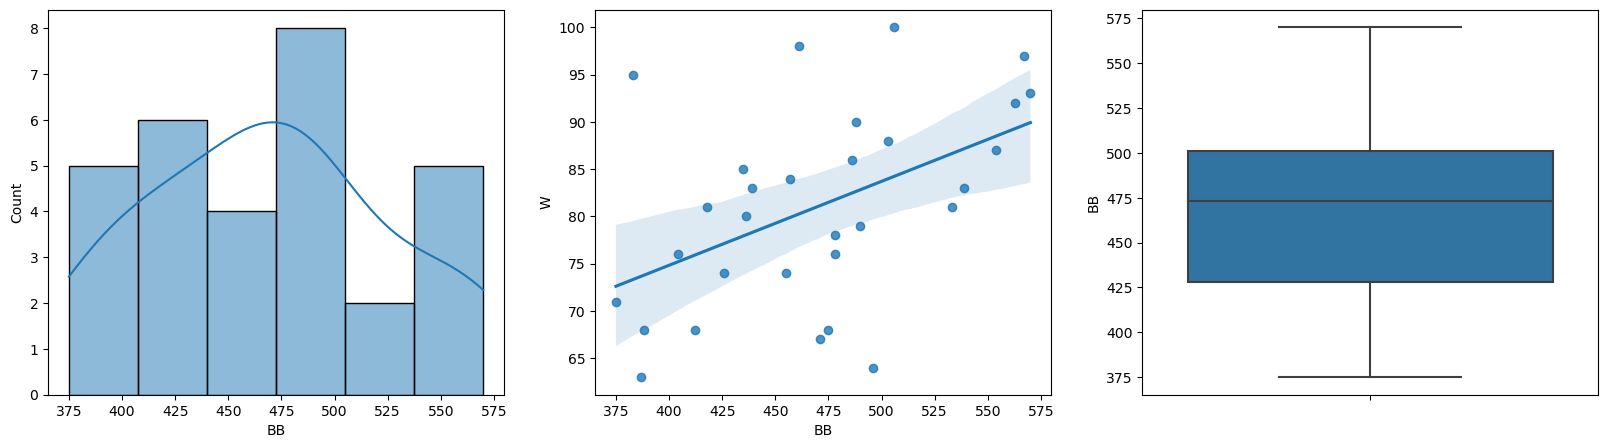

In [173]:
pplot(df, 'BB')

Walk is lightly correlated to win with no outlier

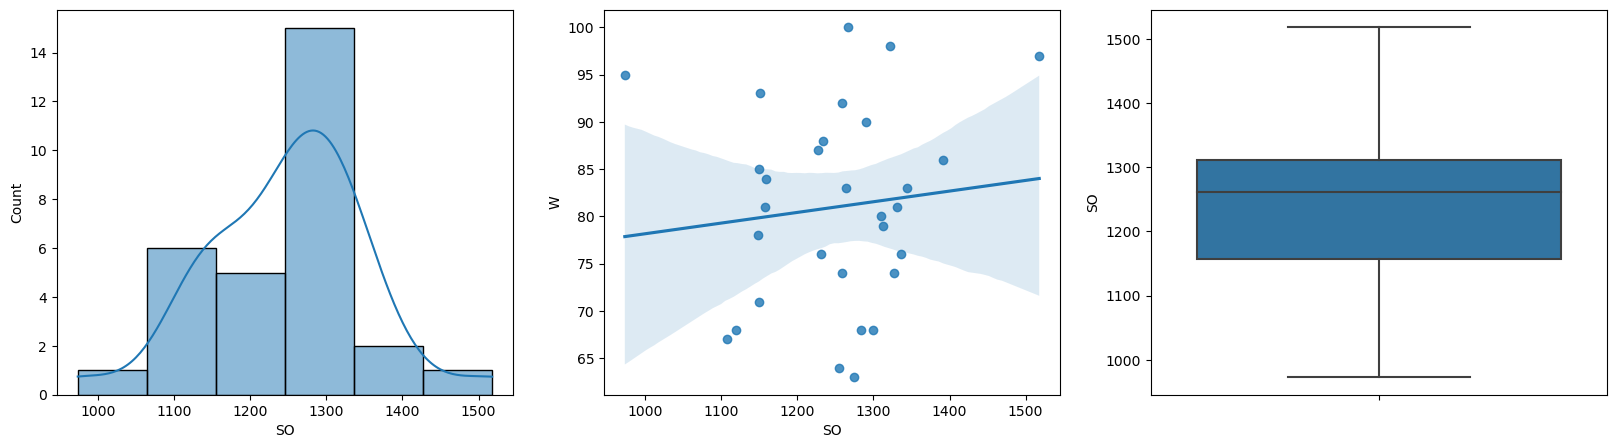

In [174]:
pplot(df, 'SO')

Strikeout is not correlated to win with no outlier and the dataset is left-skewed.

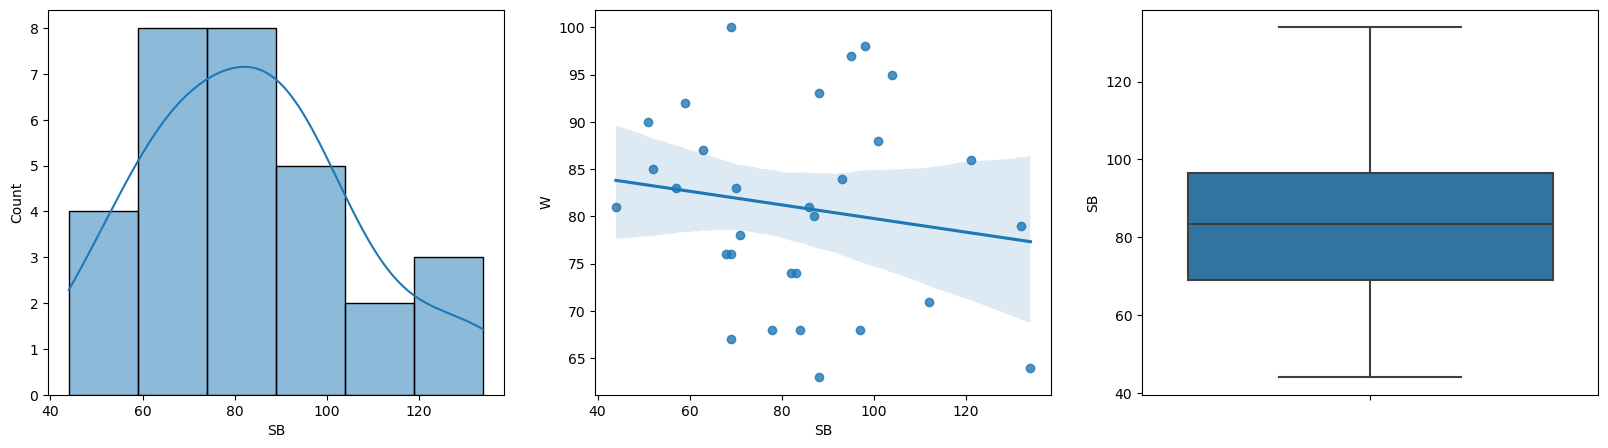

In [175]:
pplot(df, 'SB')

Stolen Bases is not correlated to win with no outlier

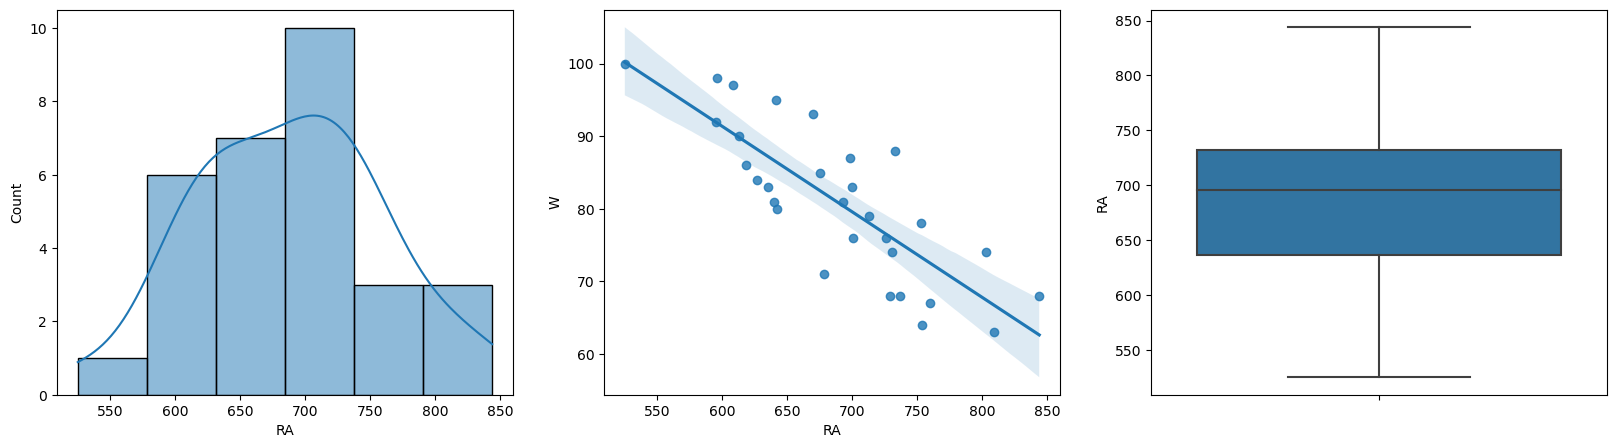

In [176]:
pplot(df, 'RA')

Runs Allowed is highly negative correlated to win with no outliers

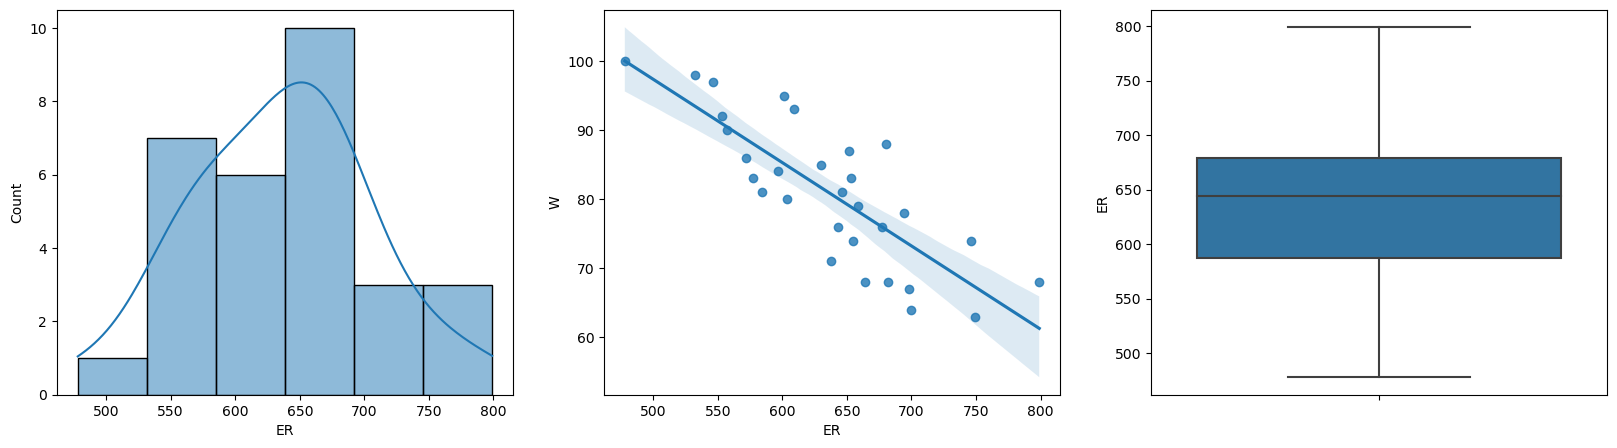

In [177]:
pplot(df, 'ER')

Earned Runs is highly negative correlated to win with no outliers

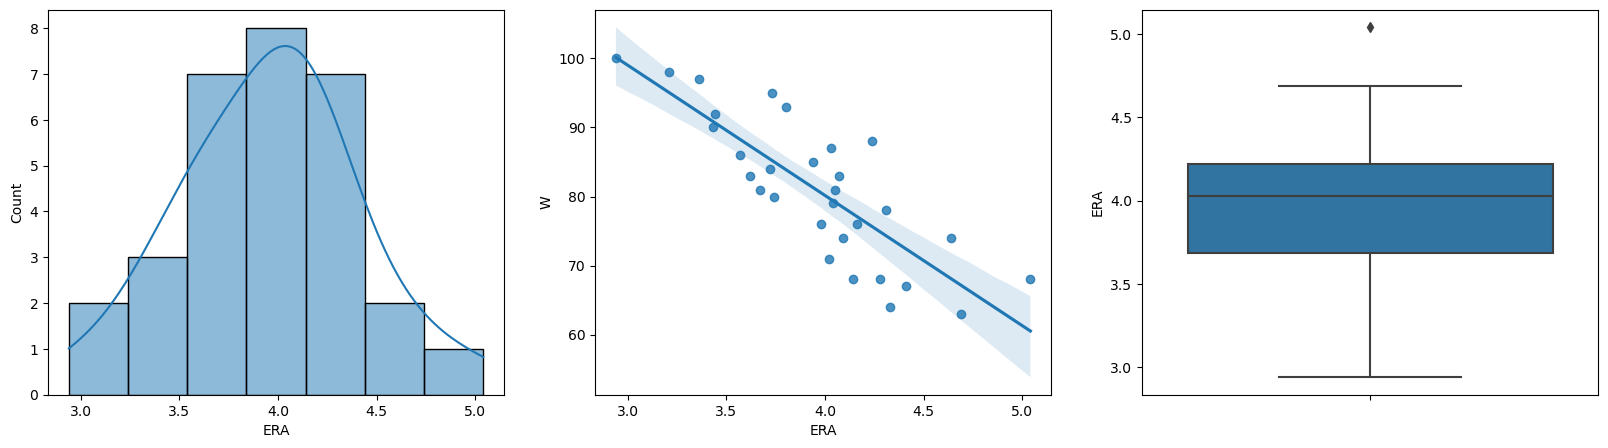

In [178]:
pplot(df, 'ERA')

Earned Run Average (ERA) is negative correlated to win with no outliers and data is right-skewed.

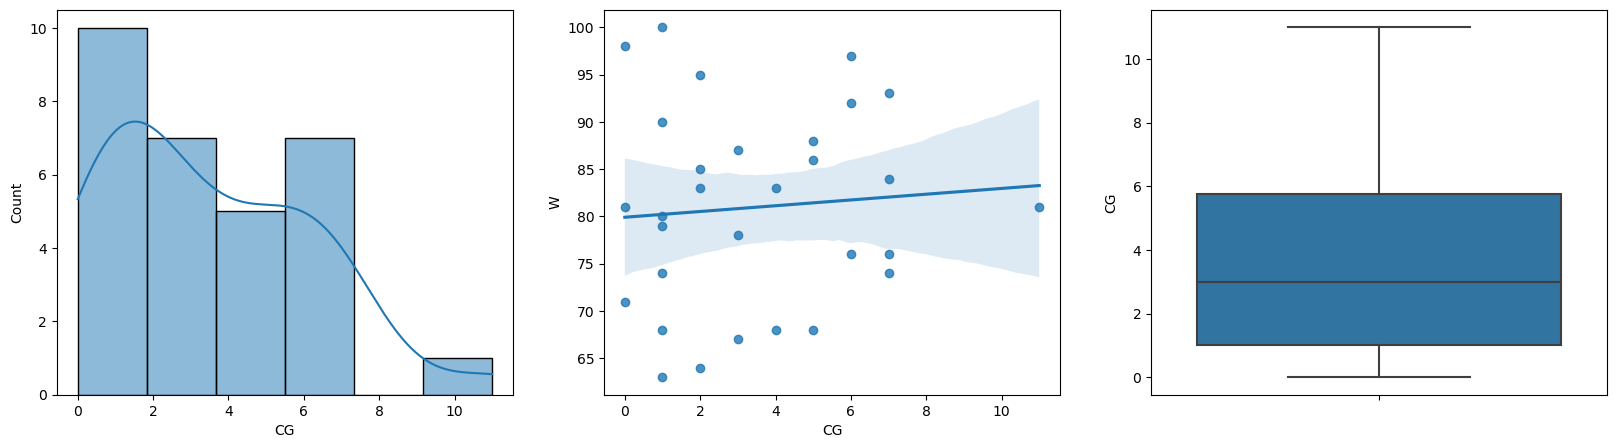

In [179]:
pplot(df, 'CG')

Complete Game is not correlated to win with no outliers

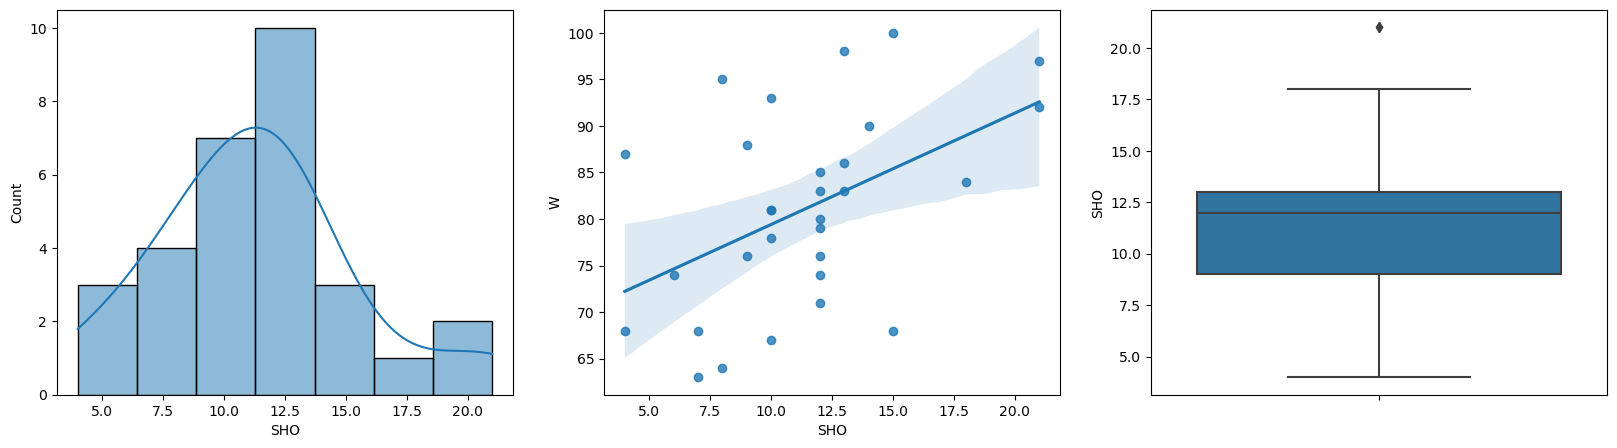

In [180]:
pplot(df, 'SHO')

Shutouts are highly correlated to win with no outliers and data is right-skewed.

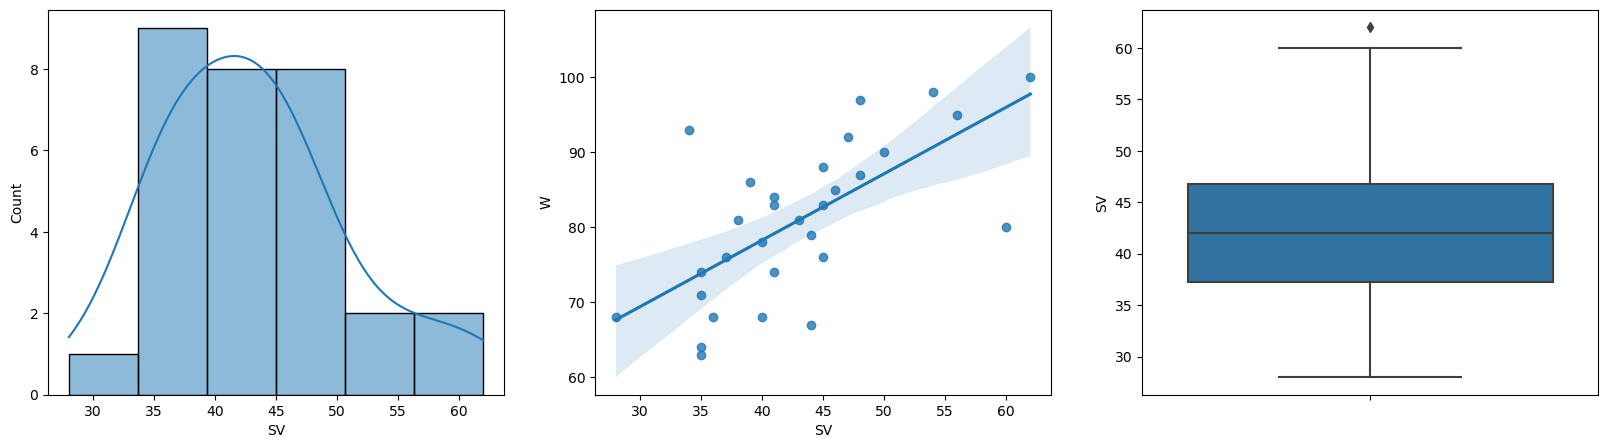

In [181]:
pplot(df, 'SV')

Saves are highly correlated to win with outliers-skewed.

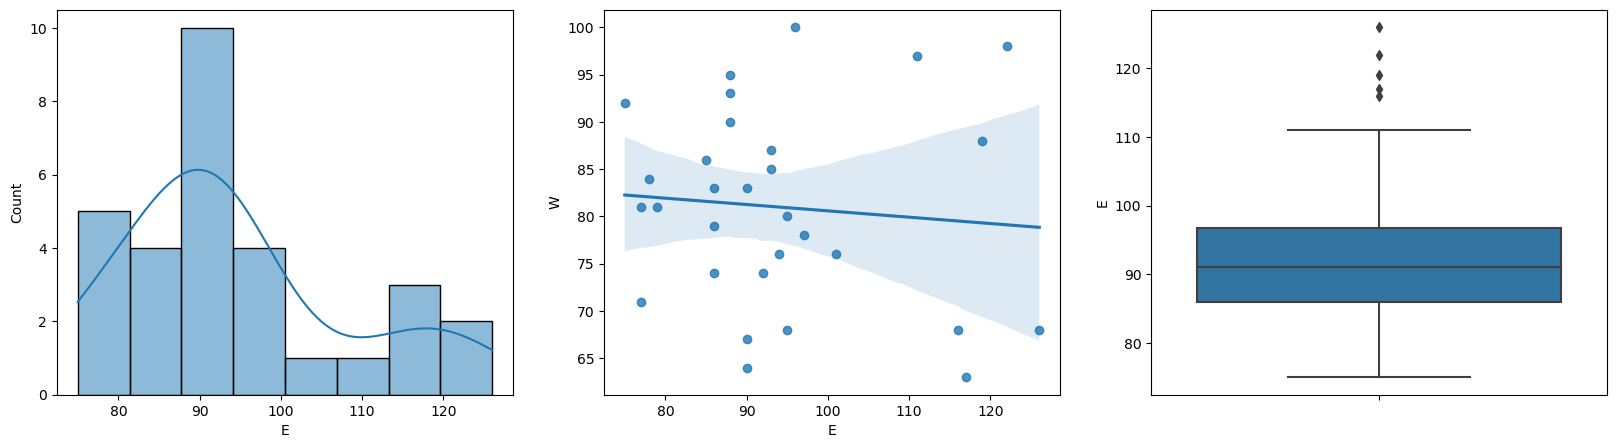

In [182]:
pplot(df, 'E')

Errors are not correlated to win, the data has outliers and data is right-skewed.

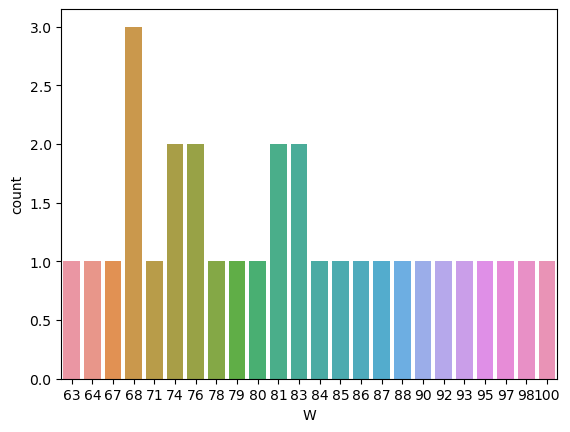

In [183]:
sns.countplot(x='W', data=df);

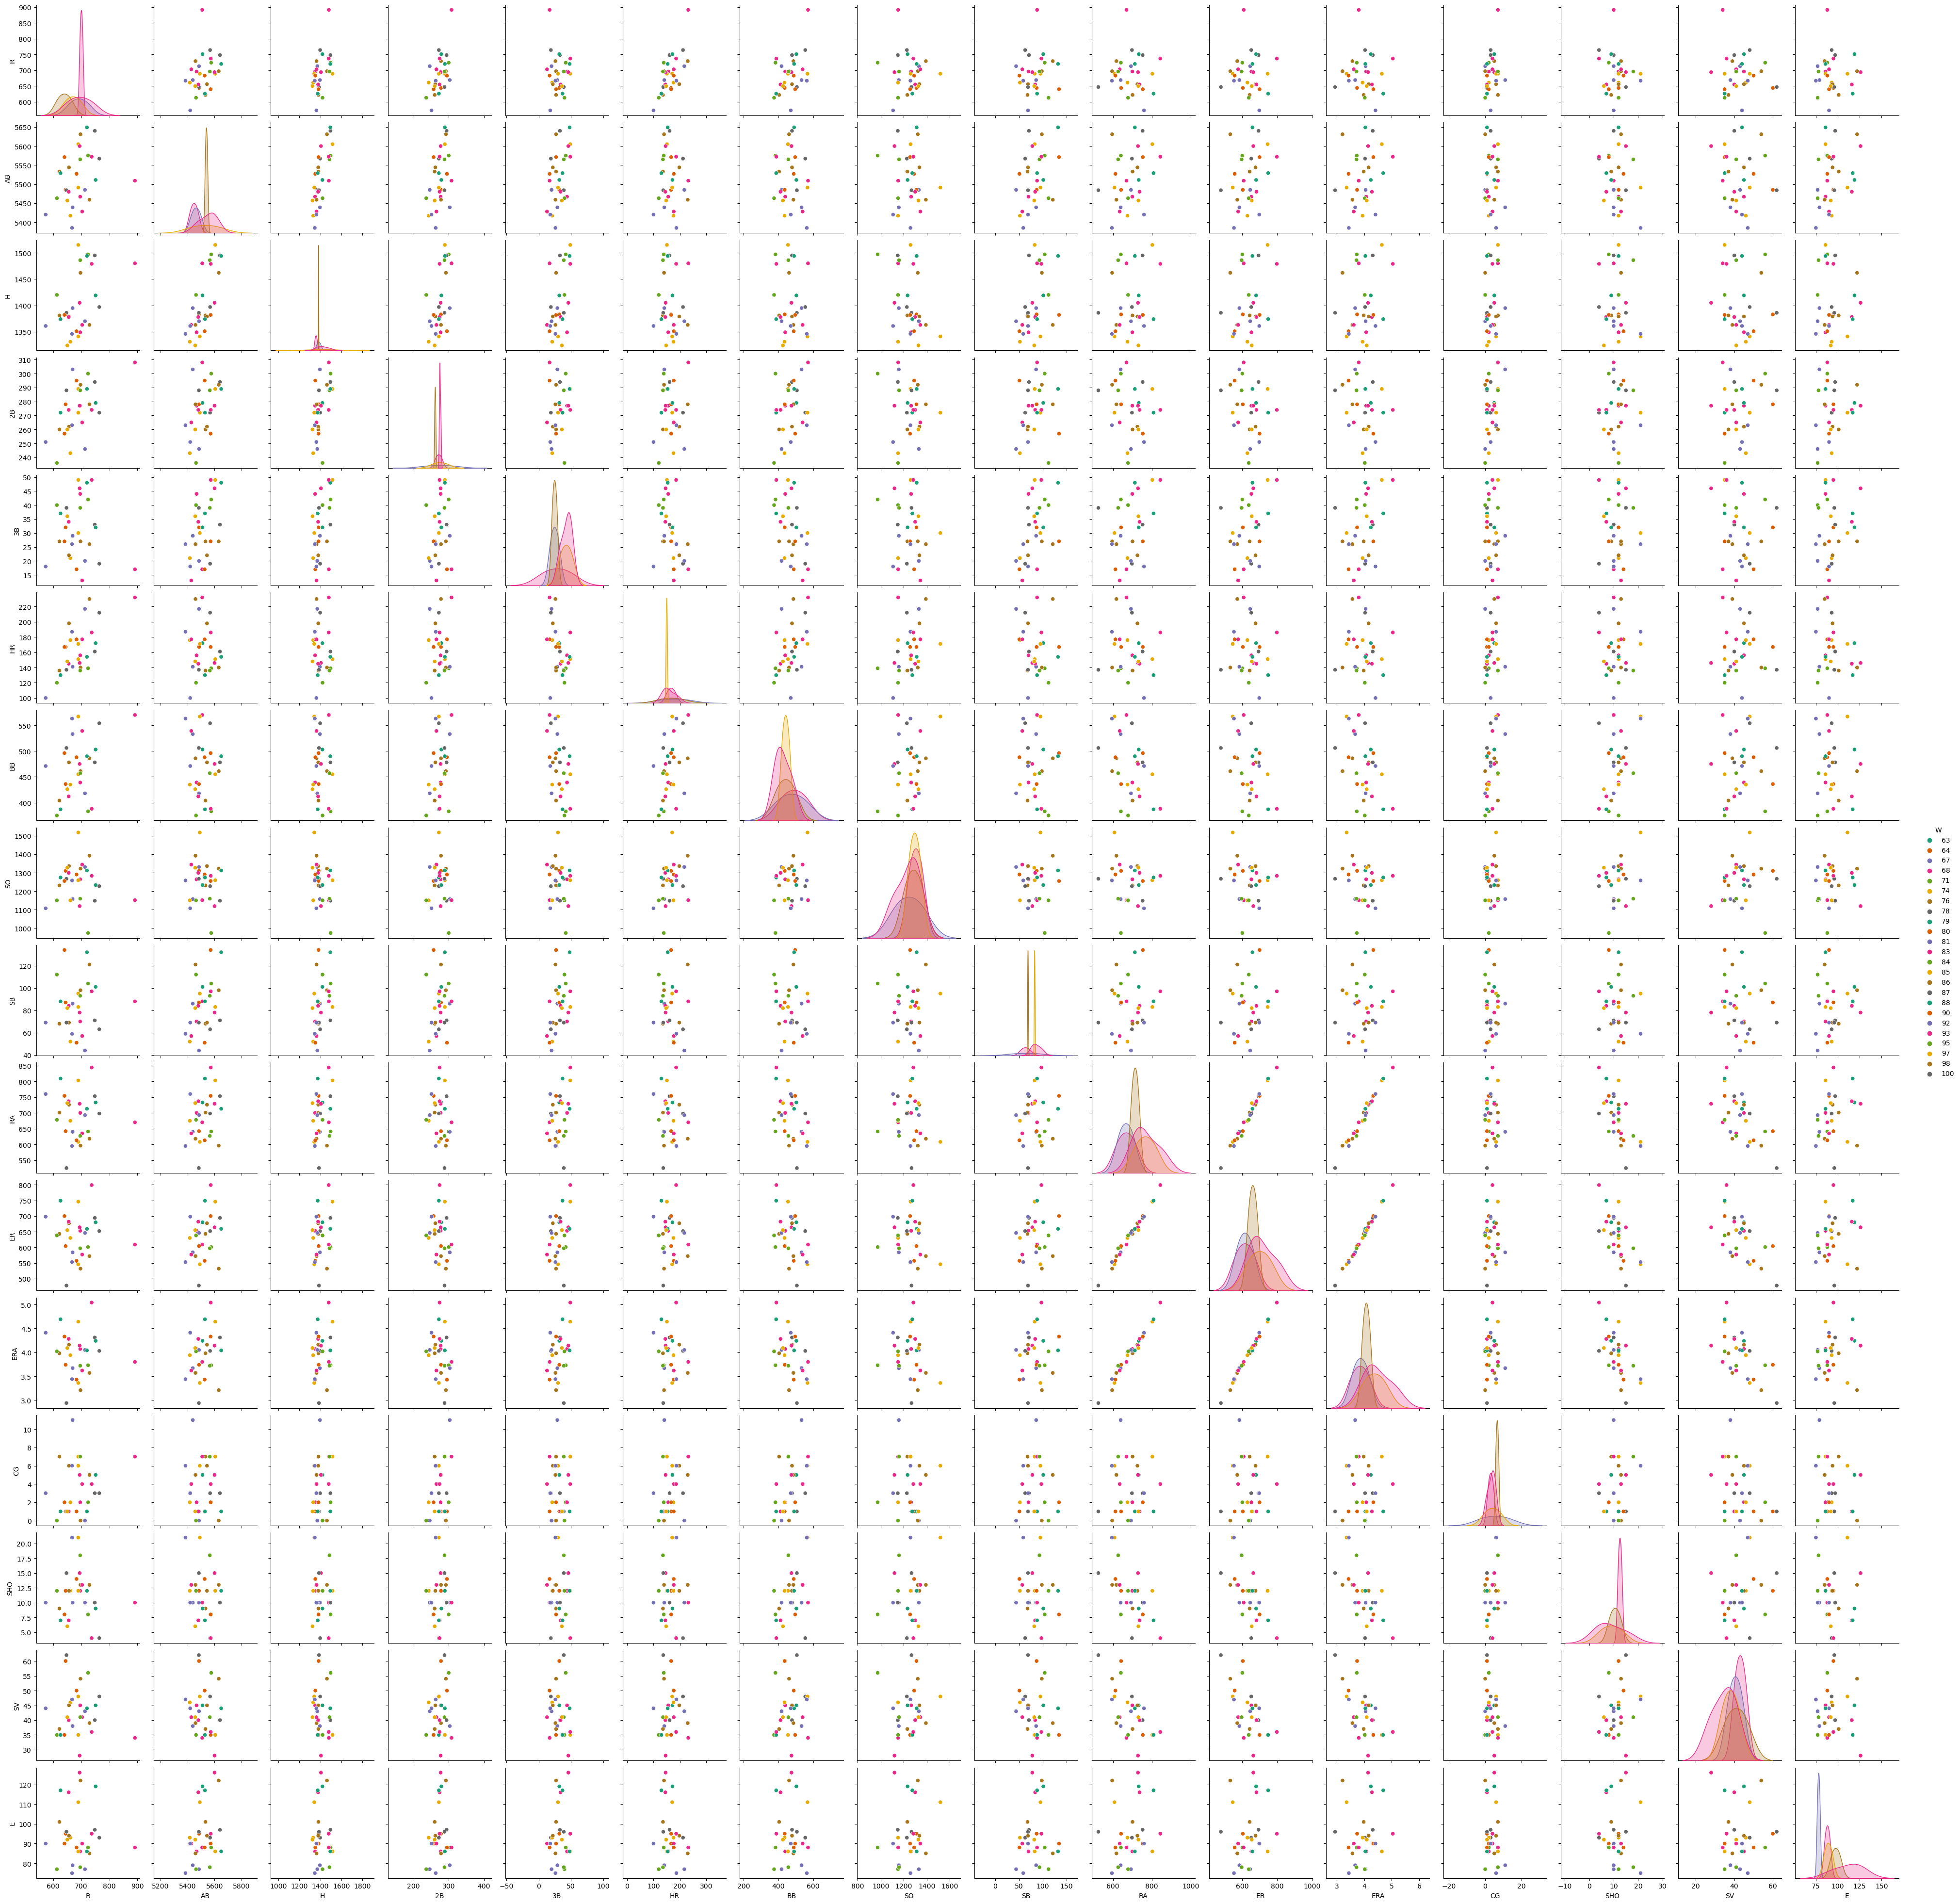

In [184]:
sns.pairplot(df, palette="Dark2", hue='W');

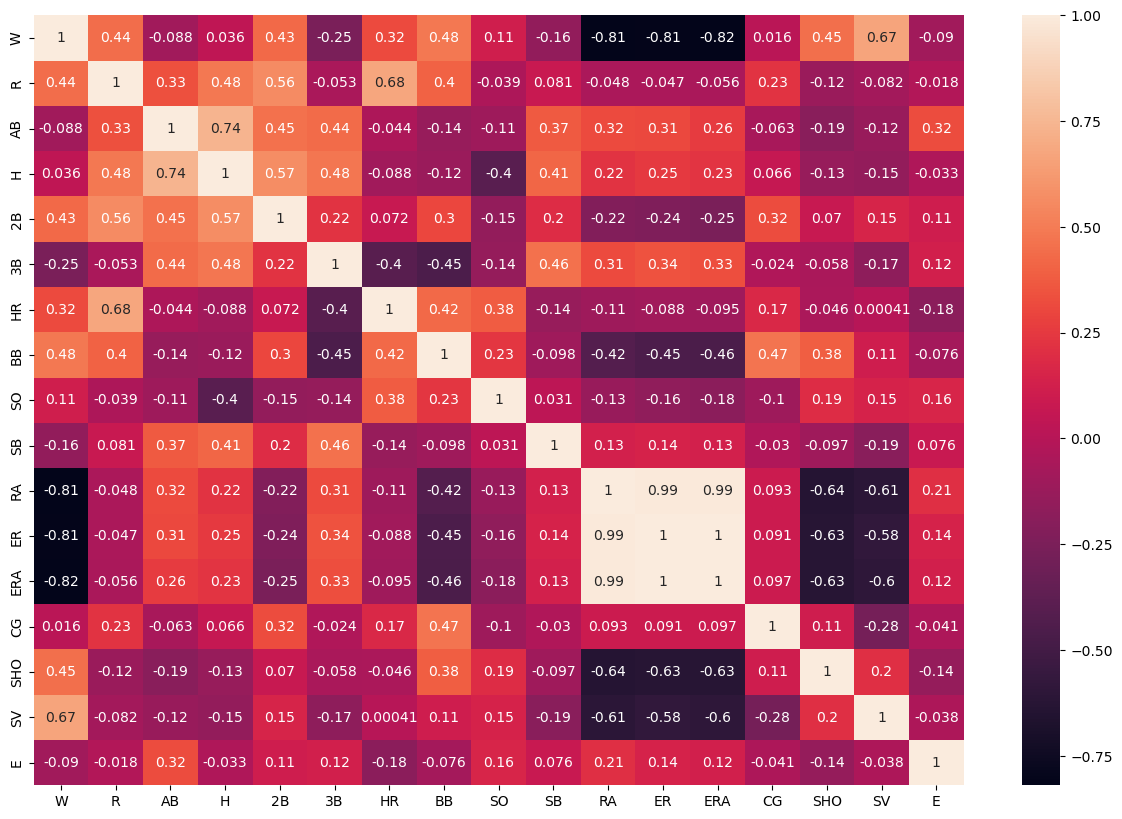

In [215]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True), annot=True);

# Model Preparation

In [189]:
# Checking Skewness

df_skew = df.skew()
df_skew

W      0.05
R      1.20
AB     0.18
H      0.67
2B    -0.23
3B     0.13
HR     0.52
BB     0.16
SO    -0.16
SB     0.48
RA     0.05
ER     0.06
ERA    0.05
CG     0.74
SHO    0.57
SV     0.66
E      0.89
dtype: float64

In [190]:
# Removing Skewness Using Cuberoot

for index, value in df_skew.iteritems():
    if value > 0.5 or value < -0.5:
        df[index] = np.cbrt(df[index])
df.skew()

W      0.05
R      0.89
AB     0.18
H      0.64
2B    -0.23
3B     0.13
HR     0.18
BB     0.16
SO    -0.16
SB     0.48
RA     0.05
ER     0.06
ERA    0.05
CG    -1.04
SHO   -0.28
SV     0.33
E      0.72
dtype: float64

In [191]:
# Assigning Feature & Target Data

x = df.drop(['W'], axis=1)
y = df[['W']]

In [192]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [193]:
# Checking Variance Inflation Factor

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
                        for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,11.30,R
1,12.28,AB
2,8.69,H
3,4.14,2B
4,3.00,3B
5,10.68,HR
6,3.76,BB
7,2.77,SO
8,1.91,SB
9,194.72,RA


In [194]:
x = x.drop(['ERA'], axis=1)

In [195]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
                        for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,10.54,R
1,4.19,AB
2,8.37,H
3,4.06,2B
4,2.99,3B
5,9.63,HR
6,3.73,BB
7,2.76,SO
8,1.74,SB
9,170.24,RA


## Train Test Split

In [196]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = .25, random_state = 39)

## Model Creation

In [197]:
!pip install lazypredict

In [198]:
import lazypredict
from lazypredict.Supervised import LazyRegressor
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
reg_models, predictions = reg.fit(xtrain, xtest, ytrain, ytest)
print(reg_models)

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:01<00:00, 25.78it/s]

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 22, number of used features: 0
[LightGBM] [Info] Start training from score 81.272727
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spl

## Model Evaluation

In [199]:
from sklearn.linear_model import Ridge
r_clf = Ridge(random_state = 39)

In [200]:
r_clf.fit(xtrain,ytrain)

Ridge(random_state=39)

In [201]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

grid_param = {'alpha':[0.0001,0.001,0.01,0.1,1,10], 
              'fit_intercept': [True,False], 
              'copy_X': [True , False], 
              'tol':[0.0001,0.001,0.01,0.1,1,10]}

In [202]:
grid_search = GridSearchCV(estimator=r_clf, param_grid=grid_param, cv=2, verbose=3)

In [203]:
grid_search.fit(xtrain,ytrain)

Fitting 2 folds for each of 144 candidates, totalling 288 fits
[CV 1/2] END alpha=0.0001, copy_X=True, fit_intercept=True, tol=0.0001;, score=0.397 total time=   0.0s
[CV 2/2] END alpha=0.0001, copy_X=True, fit_intercept=True, tol=0.0001;, score=-0.978 total time=   0.0s
[CV 1/2] END alpha=0.0001, copy_X=True, fit_intercept=True, tol=0.001;, score=0.397 total time=   0.0s
[CV 2/2] END alpha=0.0001, copy_X=True, fit_intercept=True, tol=0.001;, score=-0.978 total time=   0.0s
[CV 1/2] END alpha=0.0001, copy_X=True, fit_intercept=True, tol=0.01;, score=0.397 total time=   0.0s
[CV 2/2] END alpha=0.0001, copy_X=True, fit_intercept=True, tol=0.01;, score=-0.978 total time=   0.0s
[CV 1/2] END alpha=0.0001, copy_X=True, fit_intercept=True, tol=0.1;, score=0.397 total time=   0.0s
[CV 2/2] END alpha=0.0001, copy_X=True, fit_intercept=True, tol=0.1;, score=-0.978 total time=   0.0s
[CV 1/2] END alpha=0.0001, copy_X=True, fit_intercept=True, tol=1;, score=0.397 total time=   0.0s
[CV 2/2] END a

[CV 2/2] END alpha=0.01, copy_X=True, fit_intercept=True, tol=0.0001;, score=-0.951 total time=   0.0s
[CV 1/2] END alpha=0.01, copy_X=True, fit_intercept=True, tol=0.001;, score=0.407 total time=   0.0s
[CV 2/2] END alpha=0.01, copy_X=True, fit_intercept=True, tol=0.001;, score=-0.951 total time=   0.0s
[CV 1/2] END alpha=0.01, copy_X=True, fit_intercept=True, tol=0.01;, score=0.407 total time=   0.0s
[CV 2/2] END alpha=0.01, copy_X=True, fit_intercept=True, tol=0.01;, score=-0.951 total time=   0.0s
[CV 1/2] END alpha=0.01, copy_X=True, fit_intercept=True, tol=0.1;, score=0.407 total time=   0.0s
[CV 2/2] END alpha=0.01, copy_X=True, fit_intercept=True, tol=0.1;, score=-0.951 total time=   0.0s
[CV 1/2] END alpha=0.01, copy_X=True, fit_intercept=True, tol=1;, score=0.407 total time=   0.0s
[CV 2/2] END alpha=0.01, copy_X=True, fit_intercept=True, tol=1;, score=-0.951 total time=   0.0s
[CV 1/2] END alpha=0.01, copy_X=True, fit_intercept=True, tol=10;, score=0.407 total time=   0.0s
[

[CV 1/2] END alpha=0.1, copy_X=False, fit_intercept=False, tol=0.001;, score=-394.401 total time=   0.0s
[CV 2/2] END alpha=0.1, copy_X=False, fit_intercept=False, tol=0.001;, score=-403.778 total time=   0.0s
[CV 1/2] END alpha=0.1, copy_X=False, fit_intercept=False, tol=0.01;, score=-394.401 total time=   0.0s
[CV 2/2] END alpha=0.1, copy_X=False, fit_intercept=False, tol=0.01;, score=-403.778 total time=   0.0s
[CV 1/2] END alpha=0.1, copy_X=False, fit_intercept=False, tol=0.1;, score=-394.401 total time=   0.0s
[CV 2/2] END alpha=0.1, copy_X=False, fit_intercept=False, tol=0.1;, score=-403.778 total time=   0.0s
[CV 1/2] END alpha=0.1, copy_X=False, fit_intercept=False, tol=1;, score=-394.401 total time=   0.0s
[CV 2/2] END alpha=0.1, copy_X=False, fit_intercept=False, tol=1;, score=-403.778 total time=   0.0s
[CV 1/2] END alpha=0.1, copy_X=False, fit_intercept=False, tol=10;, score=-394.401 total time=   0.0s
[CV 2/2] END alpha=0.1, copy_X=False, fit_intercept=False, tol=10;, scor

[CV 2/2] END alpha=10, copy_X=False, fit_intercept=False, tol=0.001;, score=-142.170 total time=   0.0s
[CV 1/2] END alpha=10, copy_X=False, fit_intercept=False, tol=0.01;, score=-134.926 total time=   0.0s
[CV 2/2] END alpha=10, copy_X=False, fit_intercept=False, tol=0.01;, score=-142.170 total time=   0.0s
[CV 1/2] END alpha=10, copy_X=False, fit_intercept=False, tol=0.1;, score=-134.926 total time=   0.0s
[CV 2/2] END alpha=10, copy_X=False, fit_intercept=False, tol=0.1;, score=-142.170 total time=   0.0s
[CV 1/2] END alpha=10, copy_X=False, fit_intercept=False, tol=1;, score=-134.926 total time=   0.0s
[CV 2/2] END alpha=10, copy_X=False, fit_intercept=False, tol=1;, score=-142.170 total time=   0.0s
[CV 1/2] END alpha=10, copy_X=False, fit_intercept=False, tol=10;, score=-134.926 total time=   0.0s
[CV 2/2] END alpha=10, copy_X=False, fit_intercept=False, tol=10;, score=-142.170 total time=   0.0s


GridSearchCV(cv=2, estimator=Ridge(random_state=39),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'tol': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
             verbose=3)

In [204]:
grid_search.best_params_

{'alpha': 10, 'copy_X': True, 'fit_intercept': True, 'tol': 0.0001}

In [205]:
Final_model = Ridge(alpha=10, copy_X=True, fit_intercept=True, tol=0.0001)
Final_model.fit(xtrain, ytrain)

Ridge(alpha=10)

In [206]:
from sklearn.metrics import r2_score

rd_pred= Final_model.predict(xtest)
r2s=r2_score(ytest, rd_pred)
print('r2 score: ', r2s*100)

r2 score:  84.64544451290102
